In [1]:
import pandas as pd
import os

def merge_csv_files(input_folder, output_file):
    # Lấy danh sách tất cả các file .csv trong thư mục input
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]
    
    # Sử dụng một danh sách để lưu trữ từng DataFrame
    data_frames = []

    # Duyệt qua từng file csv và thêm vào danh sách DataFrame
    for file in csv_files:
        file_path = os.path.join(input_folder, file)
        data = pd.read_csv(file_path)
        data_frames.append(data)
    
    # Kết hợp tất cả các DataFrame thành một
    merged_data = pd.concat(data_frames, ignore_index=True)
    
    # Ghi DataFrame kết quả vào file csv đầu ra
    merged_data.to_csv(output_file, index=False)
    print(f'Merged {len(csv_files)} files into {output_file}')

# Thư mục chứa các file csv cần gộp
input_folder = 'D:\Project DeepL\Project-DeepL'
# File csv đầu ra sau khi gộp
output_file = 'merged_output.csv'

# Gộp các file csv
merge_csv_files(input_folder, output_file)


Merged 15 files into merged_output.csv


In [2]:
import pandas as pd
import numpy as np

# Đọc file CSV đã gộp
data = pd.read_csv('merged_output.csv')

# Lọc dữ liệu theo các điều kiện
one_rating_reviews = data[data['rating '] == 1]
two_rating_reviews = data[data['rating '] == 2]
three_rating_reviews = data[data['rating '] == 3]
four_rating_reviews = data[data['rating '] == 4]

# Đối với bình luận 5 sao, chỉ lấy 10% ngẫu nhiên (do số review 5 sao quá nhiều)
five_rating_reviews = data[data['rating '] == 5].sample(frac=0.1, random_state=42)

# Kết hợp tất cả các phần dữ liệu lại
filtered_data = pd.concat([one_rating_reviews, two_rating_reviews, three_rating_reviews, four_rating_reviews, five_rating_reviews])

# Lưu dữ liệu mới vào file CSV
filtered_data.to_csv('filtered_output.csv', index=False)

print(f'Dữ liệu đã được lưu vào file filtered_output.csv')


Dữ liệu đã được lưu vào file filtered_output.csv


In [3]:
file_path = 'filtered_output.csv'
df = pd.read_csv(file_path, encoding='utf-8')
print("Các cột trong DataFrame:", df.columns)

Các cột trong DataFrame: Index(['rating ', 'review'], dtype='object')


In [4]:
import re
import pandas as pd

# Hàm chuyển về chữ thường và loại bỏ ký tự đặc biệt
def to_lower_and_remove_special_chars(text):
    if isinstance(text, str):
        text = text.lower()  # chuyển về chữ thường
        # Loại bỏ các ký tự đặc biệt
        text = re.sub(r"[()\"/:.!@#$%^&*_+\-={}[\]|\\;'<,>?~`]", '', text)
        text = re.sub(r'\s+', ' ', text).strip()  # Xóa khoảng trắng thừa
    return text

# Hàm để kiểm tra xem đánh giá chỉ chứa thông tin sản phẩm
def contains_only_product_info(text):
    keywords = ["nhóm màu", "kích cỡ", "size", "kích thước", "màu sắc", "sản phẩm"]
    if isinstance(text, str):
        return any(keyword in text.lower() for keyword in keywords)
    return False

# Hàm để kiểm tra xem câu có chứa bất kỳ từ nào trong danh sách không
def contains_any_word(text, word_list):
    if isinstance(text, str):
        return any(word.lower() in text.lower() for word in word_list)
    return False

word_list = ["tôi", "\ N"]

# Hàm chuẩn hóa khoảng trắng cho "Nhóm Màu", "Kích cỡ", "Size" nếu bị viết liền
def normalize_spacing(text):
    if isinstance(text, str):
        # Thêm khoảng trắng trước "Nhóm Màu", "Kích cỡ", "Size" nếu viết liền
        text = re.sub(r'([a-zA-Z])?(NhómMàu|Nhóm màu|Kíchcỡ|Kích cỡ|Size|Kích thước|Màu sắc)', r'\1 \2', text)
    return text

# Hàm để loại bỏ dữ liệu từ "Nhóm Màu", "Kích cỡ" từ lần cuối xuất hiện trở đi
def remove_color_size(text):
    if isinstance(text, str):
        # Mẫu regex để tìm các từ khóa và xóa tất cả sau từ cuối cùng này
        pattern = r'(Nhóm Màu|Kích cỡ|Size|Màu sắc|Kích thước|Nhóm màu)(.*)$'
        text = re.sub(pattern, '', text).strip()  # Xóa từ khóa trở đi
    return text

# Hàm để loại bỏ dấu chấm, dấu phẩy, và số 0 ở cuối
def clean_end_punctuation(text):
    if isinstance(text, str):
        text = re.sub(r'[.,0]+$', '', text).strip()
    return text

# Hàm loại bỏ dấu ngoặc kép trong mỗi review
def remove_quotes(review):
    if isinstance(review, str):
        return review.strip('"')
    return review

# Hàm để loại bỏ emoji
def remove_emoji(text):
    if isinstance(text, str):
        # Biểu thức regex để loại bỏ emoji
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002500-\U00002BEF"
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
    return text

# Hàm để kiểm tra xem có từ nào trong câu dài hơn 7 ký tự không
def has_long_word(text, max_length=7):
    if isinstance(text, str):
        words = text.split()
        return any(len(word) > max_length for word in words)
    return False

# Hàm để thay thế các từ viết tắt thành từ đầy đủ
def translate_slang(text):
    slang_dict = {
        "kg": "không",
        "ik": "đi",
        "dc": "được",
        "kh": "không",
        "neen": "nên",
        "j": "gì",
        "ko": "không"
    }
    if isinstance(text, str):
        words = text.split()
        words = [slang_dict[word.lower()] if word.lower() in slang_dict else word for word in words]
        return ' '.join(words)
    return text

# Hàm để loại bỏ stop words
def remove_stop_words(text):
    stop_words = set(['và', 'là', 'có', 'những', 'đã'])
    if isinstance(text, str):
        words = text.split()
        words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(words)
    return text

# Đọc file CSV chứa các đánh giá
file_path = 'filtered_output.csv'  # Thay thế đường dẫn tới file CSV của bạn
df = pd.read_csv(file_path)

# Áp dụng các hàm xử lý dữ liệu
df_cleaned = df.copy()
df_cleaned['review'] = df_cleaned['review'].apply(remove_quotes)
df_cleaned['review'] = df_cleaned['review'].apply(normalize_spacing)
df_cleaned['review'] = df_cleaned['review'].apply(remove_color_size)
df_cleaned['review'] = df_cleaned['review'].apply(remove_emoji)
df_cleaned['review'] = df_cleaned['review'].apply(translate_slang)
df_cleaned['review'] = df_cleaned['review'].apply(remove_stop_words)
df_cleaned = df_cleaned[~df_cleaned['review'].apply(has_long_word)]
df_cleaned['review'] = df_cleaned['review'].apply(clean_end_punctuation)
df_cleaned['review'] = df_cleaned['review'].apply(to_lower_and_remove_special_chars)

# Xóa đánh giá rỗng hoặc chỉ chứa thông tin sản phẩm
df_cleaned = df_cleaned[df_cleaned['review'].str.strip().astype(bool)]
df_cleaned = df_cleaned[~df_cleaned['review'].apply(contains_only_product_info)]
df_cleaned = df_cleaned[~df_cleaned['review'].apply(lambda x: contains_any_word(x, word_list))]

# Lưu dữ liệu đã làm sạch ra file CSV mới
output_file_path = 'cleaned_output.csv'
df_cleaned.to_csv(output_file_path, encoding='utf-8', index=False)


Phân phối số lượng đánh giá theo số sao:
rating 
1     606
2     174
3     348
4     864
5    1107
Name: count, dtype: int64


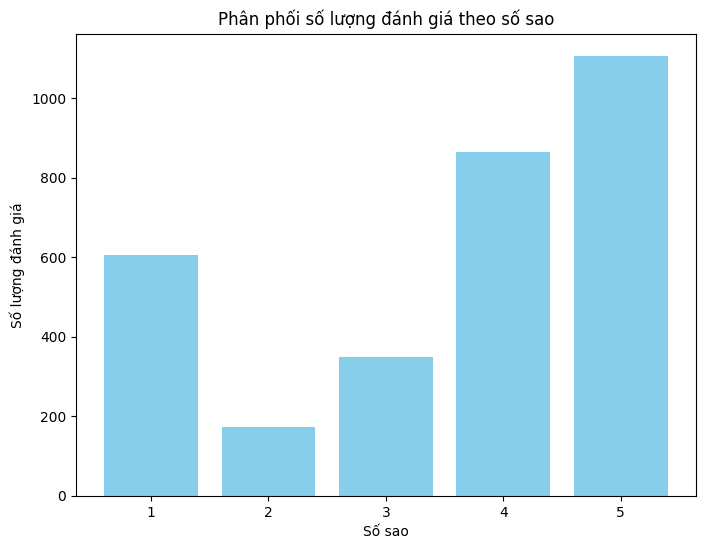

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu đã làm sạch
file_path = 'cleaned_output.csv'
df_cleaned = pd.read_csv(file_path)

# Kiểm tra phân phối số sao
rating_distribution = df_cleaned['rating '].value_counts().sort_index()
print("Phân phối số lượng đánh giá theo số sao:")
print(rating_distribution)

# Vẽ biểu đồ phân phối đánh giá theo số sao
plt.figure(figsize=(8, 6))
plt.bar(rating_distribution.index, rating_distribution.values, color='skyblue')
plt.xlabel('Số sao')
plt.ylabel('Số lượng đánh giá')
plt.title('Phân phối số lượng đánh giá theo số sao')
plt.show()

# Từ điển từ tiêu cực để kiểm tra các đánh giá 5 sao có nội dung tiêu cực
negative_words = ['tệ', 'không tốt', 'thất vọng', 'kém', 'xấu', 'chán', 'không đáng', 'lỗi', 'sai', 'đừng nên', 'không nên']

# Hàm để kiểm tra xem có từ tiêu cực trong đánh giá không
def contains_negative_word(text):
    if isinstance(text, str):
        return any(word in text for word in negative_words)
    return False

# Lọc ra các đánh giá 5 sao có nội dung tiêu cực và đánh giá 1 sao có nội dung tích cực
df_abnormal = df_cleaned[((df_cleaned['rating '] == 5) & df_cleaned['review'].apply(contains_negative_word)) |
                         ((df_cleaned['rating '] == 1) & ~df_cleaned['review'].apply(contains_negative_word))]


# Xử lý các đánh giá bất thường (gán nhãn lại hoặc loại bỏ)
# Ví dụ: Loại bỏ các đánh giá bất thường
df_cleaned = df_cleaned.drop(df_abnormal.index)

# Lưu dữ liệu sau khi loại bỏ các đánh giá bất thường
output_file_path = 'cleaned_output_no_abnormal.csv'
df_cleaned.to_csv(output_file_path, encoding='utf-8', index=False)


In [7]:
import pandas as pd

# Đọc từ điển từ tệp words.txt
with open('Dictionary\words.txt', 'r', encoding='utf-8') as file:
    dictionary_words = file.read().splitlines()

# Đọc file CSV chứa dữ liệu
file_path = 'filtered_output.csv'  # Thay thế bằng đường dẫn tới file CSV của bạn
df = pd.read_csv(file_path, encoding='utf-8')

# Hàm để kiểm tra từ trong từ điển
def check_words_in_dictionary(text, dictionary_words):
    if isinstance(text, str):
        words = text.split()
        return [word for word in words if word in dictionary_words]
    return []

# Áp dụng hàm check_words_in_dictionary vào cột review
df['words_in_dictionary'] = df['review'].apply(lambda x: check_words_in_dictionary(x, dictionary_words))

# Hiển thị kết quả
print(df[['review', 'words_in_dictionary']])


FileNotFoundError: [Errno 2] No such file or directory: 'Project-DeepL\\Dictionary\\words.txt'